In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O ./horse-or-human.zip

--2025-07-28 16:22:55--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.28.91, 172.217.162.251, 172.217.162.187, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.28.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘./horse-or-human.zip’

./horse-or-human.zi 100%[===================>] 142.65M  30.6MB/s    in 5.9s    

2025-07-28 16:23:02 (24.4 MB/s) - ‘./horse-or-human.zip’ saved [149574867/149574867]



In [4]:
import os
import zipfile
 
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [5]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')
 
# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse19-1.png', 'horse37-1.png', 'horse26-3.png', 'horse28-1.png', 'horse46-8.png', 'horse18-9.png', 'horse36-0.png', 'horse36-6.png', 'horse43-7.png', 'horse21-0.png']
['human10-04.png', 'human09-23.png', 'human14-07.png', 'human12-07.png', 'human13-24.png', 'human06-04.png', 'human12-17.png', 'human04-23.png', 'human05-24.png', 'human01-19.png']


In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


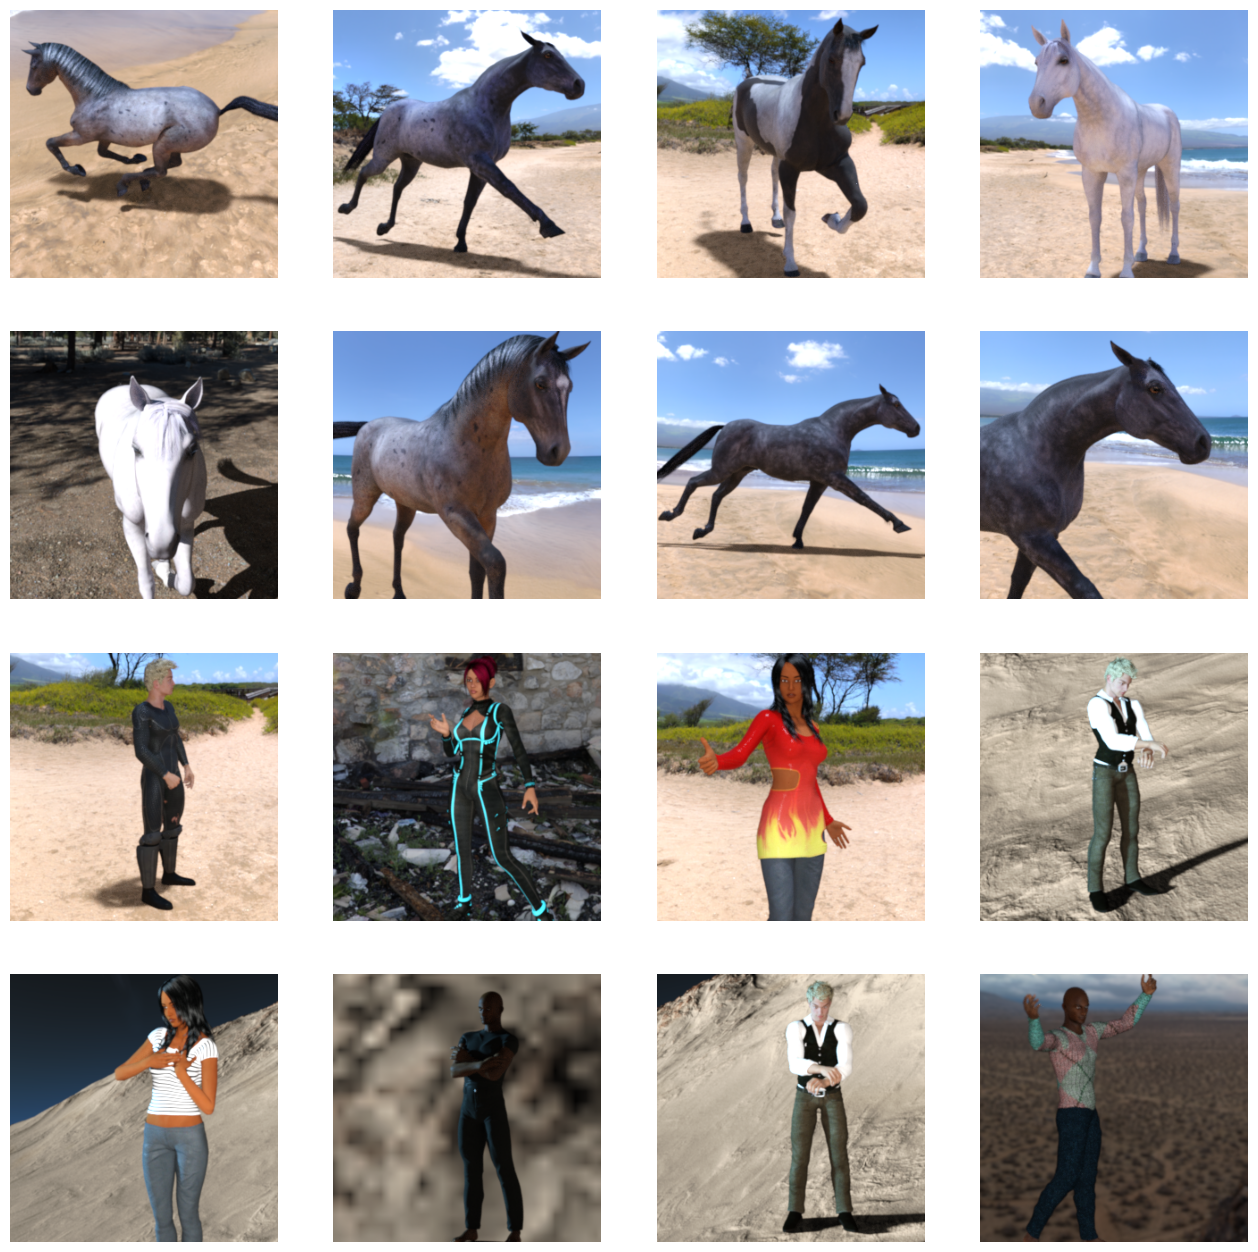

In [9]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()
 

In [11]:
import tensorflow as tf

2025-07-28 16:28:53.292451: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-28 16:28:53.292973: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-28 16:28:53.295338: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-28 16:28:53.300186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753730933.309327   74148 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753730933.31

In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

/home/cordeiro/my-projects/deep_learning_ufv/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-28 16:28:56.013332: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['acc']
)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',  # This is the source directory for training images
    target_size=(300, 300),  # All images will be resized to 150x150
    batch_size=128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,  
    epochs=15,
    verbose=1
)

/home/cordeiro/my-projects/deep_learning_ufv/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - acc: 0.5188 - loss: 0.6910
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8594 - loss: 0.6030
Epoch 3/15
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - acc: 0.6667 - loss: 0.9470

/home/cordeiro/my-projects/deep_learning_ufv/venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - acc: 0.5855 - loss: 0.8691
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.6172 - loss: 0.5845
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - acc: 0.6396 - loss: 0.7578
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9297 - loss: 0.4000
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - acc: 0.8887 - loss: 0.3461
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8906 - loss: 0.3101
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - acc: 0.9153 - loss: 0.2448
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9219 - loss: 0.2124
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - acc: 0.9417 - loss: 0.1590
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9141 - loss: 0.2688
Epoch 13/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - acc: 0.9636 - loss: 0.1245
Epoch 14/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9688 - loss: 0.0973
Epoch 15/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - acc: 0.9050 - loss: 0.2661


In [24]:
from keras.preprocessing import image
import numpy as np

# Caminho da imagem local
img_path = './horse-or-human/horses/horse01-0.png'

img = image.load_img(img_path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0] > 0.5:
    print(img_path + " é um humano")
else:
    print(img_path + " é um cavalo")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.]
./horse-or-human/horses/horse01-0.png é um cavalo
